In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


import pandas as pd
import io

df = pd.read_csv("/content/gdrive/MyDrive/water_potability.csv")

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
X = df.drop(['Potability'], axis='columns')
y = df.Potability

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

# Assuming you have your dataset in X and y

# SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Borderline-SMOTE
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_borderline, y_borderline = borderline_smote.fit_resample(X, y)

# SVMSMOTE
svm_smote = SVMSMOTE(sampling_strategy='auto', random_state=42)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# SMOTE-Tomek
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X, y)

# SMOTE-ENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X, y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


features_scaler = MinMaxScaler()


features_smote = features_scaler.fit_transform(X_smote)
features_adasyn = features_scaler.fit_transform(X_adasyn)
features_borderline = features_scaler.fit_transform(X_borderline)
features_svm_smote = features_scaler.fit_transform(X_svm_smote)
features_smote_tomek= features_scaler.fit_transform(X_smote_tomek)
features_smote_enn= features_scaler.fit_transform(X_smote_enn)

In [ ]:
features_simple= features_scaler.fit_transform(X)

In [ ]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score

mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(),
        ExtraTreeClassifier(), KNeighborsClassifier(), SVC(), RandomForestClassifier(), LogisticRegression(),
        MLPClassifier(), LGBMClassifier() ]
for m in model:
    cv_score.append(cross_val_score(m, X_smote_enn, y_smote_enn , scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 503, number of negative: 382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 885, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568362 -> initscore=0.275170
[LightGBM] [Info] Start training from score 0.275170
[LightGBM] [Info] Number of positive: 503, number of negative: 382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 885, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568362 -> initscore=0.275170
[LightGBM] [Info] Start training from score 0.275170
[LightGBM] [Info] Number

,model,cv_score
9,MLPClassifier(),0.550972
6,SVC(),0.568203
8,LogisticRegression(),0.570923
4,ExtraTreeClassifier(),0.639570
0,AdaBoostClassifier(),0.652244
3,DecisionTreeClassifier(),0.672076
2,GradientBoostingClassifier(),0.699266
1,BaggingClassifier(),0.705560
7,RandomForestClassifier(),0.736248
10,LGBMClassifier(),0.738979


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30,50],
            'kernel': ['rbf','linear','poly']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [60,70,80,100,200,300,400,500,600,700]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,15,20,25,30]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,7,10,12,16,17,20,21,25,30,35,40,42,44,48,50,55,59,60]
        }
    },
    'Gradient_Boosting':
        {
            'model': GradientBoostingClassifier(),
            'params' : {
            'n_estimators': [60,70,80,100,200,300,400,500,600,700]
        }
        },
    'Bagging_Classifier':
    {
        'model': BaggingClassifier(),
        'params' : {
         'n_estimators': [60,70,80,100,200,300,400,500,600,700]
        }
    },
    'DecisionTree_Classifier':
    {
        'model': DecisionTreeClassifier(),
        'params' : { 'criterion': ['gini']
        }
    }

}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(features_smote_enn, y_smote_enn)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score.sort_values(by=['best_score'], ascending=True).style.background_gradient(subset=['best_score'])

,model,best_score,best_params
2,logistic_regression,0.577200,{'C': 1}
0,svm,0.599812,"{'C': 50, 'kernel': 'rbf'}"
6,DecisionTree_Classifier,0.676597,{'criterion': 'gini'}
3,KNN,0.721805,{'n_neighbors': 1}
1,random_forest,0.740744,{'n_estimators': 80}
5,Bagging_Classifier,0.747096,{'n_estimators': 70}
4,Gradient_Boosting,0.749847,{'n_estimators': 700}


<H3> ALL THE ABOVE MODELS ARE TRAINED AFTER AUGMENTING WITH SMOTE ENN AS IT GIVES THE BEST RESULTS ON ALL MODELS COMPARED TO OTHER DATA AUGMENTATION TECHNIQUES

<h1> GradientBoostingClassifier

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X_smote_enn, y_smote_enn, random_state=42)

scale = MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

<ipython-input-24-8eec9a443937>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, df_visualize in enumerate(df.groupby(["Potability"])):


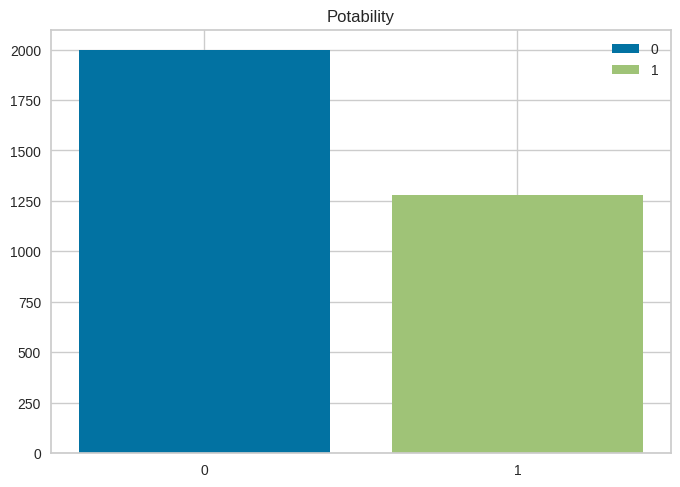

In [ ]:
import matplotlib.pyplot as plt

labels = []
for i, df_visualize in enumerate(df.groupby(["Potability"])):
    labels.append(df_visualize[0])
    plt.bar(i, df_visualize[1].count(), label=df_visualize[0])
plt.xticks(range(len(labels)), labels)
plt.legend()
plt.title('Potability')
plt.show()

In [ ]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

              precision    recall  f1-score   support

           0       0.80      0.71      0.76       119
           1       0.80      0.87      0.83       158

    accuracy                           0.80       277
   macro avg       0.80      0.79      0.79       277
weighted avg       0.80      0.80      0.80       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

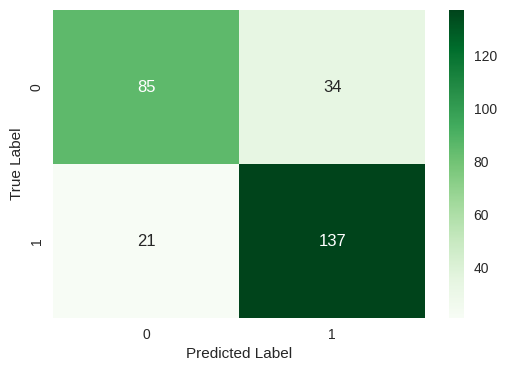

In [ ]:
model = GradientBoostingClassifier(n_estimators=3000)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
gb=accuracy_score(y_test,pred)

import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend()

# Save the figure
fig_path = '/content/sample_plot.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

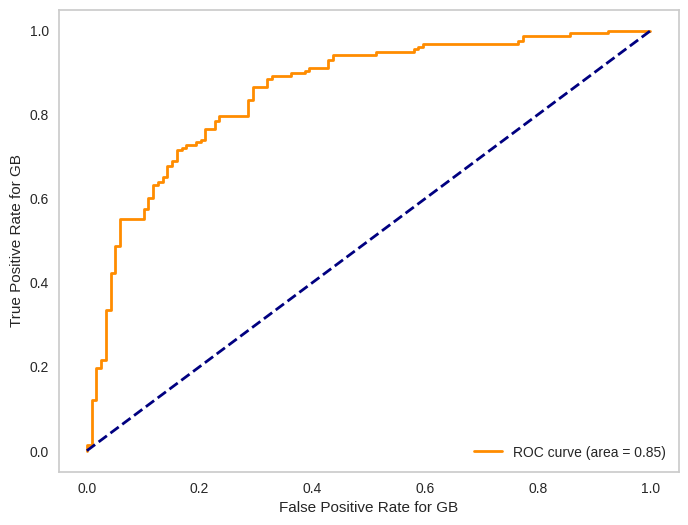

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate for GB')
plt.ylabel('True Positive Rate for GB')
plt.legend(loc='lower right')
plt.grid(False)
# Save the figure
fig_path = '/content/aucroc.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

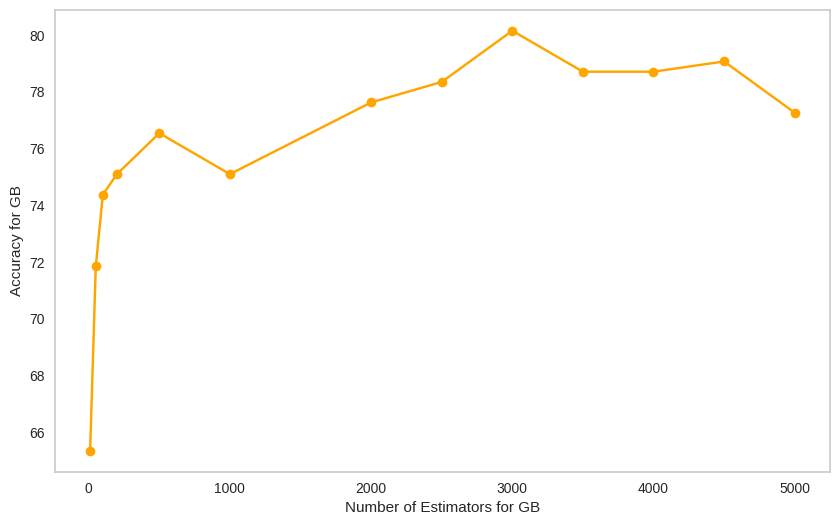

In [ ]:
n_estimators_values = [10, 50, 100, 200, 500, 1000, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

# Lists to store accuracy values
accuracies = []

for n_estimators in n_estimators_values:
    # Assuming you have a trained Gradient Boosting Classifier
    # Replace this with your actual model
    model = GradientBoostingClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy*100)

# Plotting the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracies, color='orange',marker='o')

plt.xlabel('Number of Estimators for GB')
plt.ylabel('Accuracy for GB')
plt.grid(False)
fig_path = '/content/estimators.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

N_estimators. n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

<h1> BaggingClassifier

In [ ]:
model = BaggingClassifier(n_estimators=900)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
bc=accuracy_score(y_test,pred)

import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend()

fig_path = '/content/image2.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       119
           1       0.76      0.83      0.79       158

    accuracy                           0.75       277
   macro avg       0.75      0.74      0.74       277
weighted avg       0.75      0.75      0.75       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> Decision Tree

In [ ]:
model = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
dt=accuracy_score(y_test,pred)

import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend()

fig_path = '/content/image3.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

              precision    recall  f1-score   support

           0       0.67      0.49      0.56       119
           1       0.68      0.82      0.74       158

    accuracy                           0.68       277
   macro avg       0.67      0.65      0.65       277
weighted avg       0.67      0.68      0.66       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> RandomForestClassifier

In [ ]:
model = RandomForestClassifier(criterion='gini',n_estimators=50)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
rf=accuracy_score(y_test,pred)

import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend()

fig_path = '/content/image4.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       119
           1       0.74      0.77      0.76       158

    accuracy                           0.71       277
   macro avg       0.71      0.71      0.71       277
weighted avg       0.71      0.71      0.71       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<H1> KNN

- The leaf size controls the minimum number of points in a given node, and effectively adjusts the tradeoff between the cost of node traversal and the cost of a brute-force distance estimate.

- n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.


In [ ]:
model = KNeighborsClassifier(n_neighbors=8, leaf_size=20)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
knn=accuracy_score(y_test,pred)

import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="PiYG")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend()

fig_path = '/content/image5.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       119
           1       0.73      0.75      0.74       158

    accuracy                           0.70       277
   macro avg       0.69      0.69      0.69       277
weighted avg       0.70      0.70      0.70       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Low Bias, High Variance:** When KNN uses only one neighbor (k=1), the model's decision is heavily influenced by the closest single data point. This can lead to a model that fits the training data very closely, effectively memorizing the training set. This is a classic sign of overfitting because the model may struggle to generalize to unseen data.

<H1> SVM

In [ ]:
model = SVC(kernel ='poly', degree = 8)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
svm=accuracy_score(y_test,pred)

import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greys")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend()

fig_path = '/content/image6.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       119
           1       0.73      0.75      0.74       158

    accuracy                           0.70       277
   macro avg       0.69      0.69      0.69       277
weighted avg       0.70      0.70      0.70       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The impact of the kernel on the accuracy of the SVM model depends on whether the data is linearly separable or not, the complexity of the underlying patterns, and the choice of appropriate kernel hyperparameters.

<H1> LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression(max_iter=500,random_state=0)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
lr=accuracy_score(y_test,pred)

import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend()

fig_path = '/content/image7.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

              precision    recall  f1-score   support

           0       0.53      0.24      0.33       119
           1       0.59      0.84      0.70       158

    accuracy                           0.58       277
   macro avg       0.56      0.54      0.51       277
weighted avg       0.57      0.58      0.54       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(learning_rate= 1,n_estimators= 20,random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
ab=accuracy_score(y_test,pred)

import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend()

fig_path = '/content/image8.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

              precision    recall  f1-score   support

           0       0.60      0.41      0.49       119
           1       0.64      0.79      0.71       158

    accuracy                           0.63       277
   macro avg       0.62      0.60      0.60       277
weighted avg       0.62      0.63      0.61       277



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

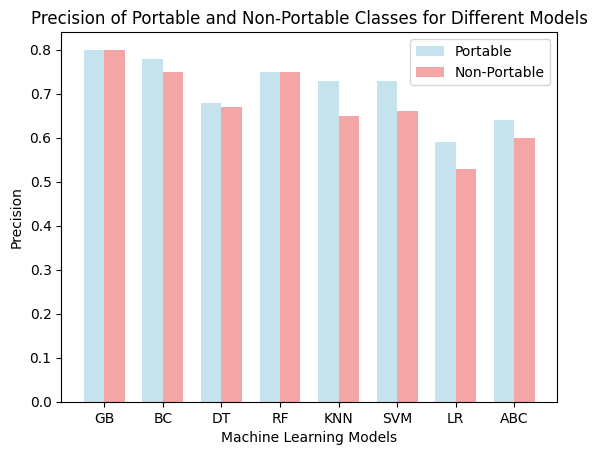

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample precision values for demonstration purposes
precision_portable = [0.80, 0.78, 0.68, 0.75, 0.73, 0.73, 0.59, 0.64]
precision_non_portable = [0.80, 0.75, 0.67, 0.75, 0.65, 0.66, 0.53, 0.60]

models = ['GB', 'BC', 'DT', 'RF', 'KNN', 'SVM', 'LR', 'ABC']

bar_width = 0.35

# Set positions for the bars
bar_positions = np.arange(len(models))

# Set different colors for portable and non-portable
color_portable = 'lightblue'
color_non_portable = 'lightcoral'

# Create bar chart for portable
plt.bar(bar_positions - bar_width/2, precision_portable, width=bar_width, label='Portable', color=color_portable, alpha=0.7)

# Create bar chart for non-portable
plt.bar(bar_positions + bar_width/2, precision_non_portable, width=bar_width, label='Non-Portable', color=color_non_portable, alpha=0.7)

# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Precision')
plt.title('Precision of Portable and Non-Portable Classes for Different Models')
plt.xticks(bar_positions, models)
plt.legend()

fig_path = '/content/precision.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)


<H1> Final Comparison

In [ ]:
models = pd.DataFrame({
    'Model':['GradientBoostingClassifier','BaggingClassifier','DecisionTreeClassifier','RandomForestClassifier','KNN','SVM','Logistic Regression','AdaBoostClassifier'],
    'Accuracy_score' :[gb, bc, dt, rf, knn, svm, lr,ab]
})
models.sort_values(by=['Accuracy_score'], ascending=True).style.background_gradient(subset=['Accuracy_score'])


,Model,Accuracy_score
6,Logistic Regression,0.581227
7,AdaBoostClassifier,0.628159
2,DecisionTreeClassifier,0.675090
4,KNN,0.696751
5,SVM,0.700361
3,RandomForestClassifier,0.747292
1,BaggingClassifier,0.765343
0,GradientBoostingClassifier,0.801444


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


models = pd.DataFrame({
    'Model': ['GB', 'BC', 'DT', 'RF',
              'KNN', 'SVM', 'LR', 'ABC'],
    'Accuracy_score': [0.801444*100, 0.765343*100, dt*100, rf*100, knn*100, svm*100, lr*100, ab*100]
})

# Sort the dataframe by Accuracy_score in ascending order
models = models.sort_values(by=['Accuracy_score'], ascending=True)
pastel_blue = (0.678431, 0.847059, 0.901961, 1.0)
# Get a colormap
cmap = get_cmap('viridis')

plt.figure(figsize=(10, 6))

# Use the 'viridis' colormap for coloring bars
bars = plt.bar(models['Model'], models['Accuracy_score'], color=pastel_blue)

# Display accuracy percentages directly on top of the bars
for bar, acc in zip(bars, models['Accuracy_score']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.2f}%', fontsize=9, color='black')

plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score(%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x')

plt.tight_layout()
plt.legend()

fig_path = '/content/comparisionall.png'  # Specify the path where you want to save the image
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

# Download the saved image
from google.colab import files
files.download(fig_path)

<ipython-input-59-824fbb64e0c8>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Our accuracy varies from 78% to 82% due to the following reasons:**::

**Randomness in SMOTE and Data Splitting**: SMOTE involves selecting random minority class samples and creating synthetic examples based on their nearest neighbors. Depending on the random sampling of these instances and the choice of nearest neighbors, you can get slightly different synthetic data points each time you run the code.

**Data Split Variability:** If you are splitting your data into training and testing subsets, there is randomness in the data split process as well. The choice of which instances go into the training set and which go into the test set can vary from one run to another.

**Model Initialization:** Many machine learning models have random initialization of weights. The initial conditions of the model can influence how it converges during training. Consequently, small differences in initial conditions can lead to variations in the model's performance.

## **To mitigate the variability in accuracy when using SMOTE-ENN or other techniques, consider the following:**

- Perform multiple runs and calculate the average and standard deviation of accuracy scores to get a more robust estimate of the model's performance.
- Use techniques like k-fold cross-validation, which can help reduce the impact of random variability in the data split.
- Ensure that you set random seeds or random_state parameters consistently to make your results reproducible when debugging and comparing different runs.

<h1> H20 Auto ML - StackedEnsemble model

In [ ]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwf7o9lpr
  JVM stdout: /tmp/tmpwf7o9lpr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwf7o9lpr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_duqyr3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


import pandas as pd
import io

df = pd.read_csv("/content/gdrive/MyDrive/water_potability.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
h2o_df = h2o.H2OFrame(df)
h2o_df['Potability']=h2o_df['Potability'].asfactor()
X=h2o_df.columns[0:-1]
y=h2o_df.columns[-1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train, test=h2o_df.split_frame(ratios=[.7])
print(train.nrows)
print(test.nrows)

2285
991


In [ ]:
aml = H2OAutoML(balance_classes=True)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
aml.leaderboard

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


H2OFrame is empty.

In [ ]:
type(test['Potability'])

In [ ]:
pred = aml.leader.predict(test)
y_val = h2o.as_list(test['Potability'], use_pandas=True)
pred_val = h2o.as_list(pred['predict'], use_pandas=True)
print(classification_report(y_val,pred_val))